In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import joblib
from shared import *

In [2]:
data = pd.read_csv('data/tic-tac-toe-mat copy.data', header=None)
parsed_data = data.apply(parse_line, axis=1)

X = parsed_data.iloc[:, :9]
Y = parsed_data.iloc[:, 9]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)

In [4]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
y_pred = model.predict(X_test)

In [6]:
# board_df = pd.DataFrame([['1', '-1', '1', '1', '0', '0', '1', '1', '0']])

# y_prediction = model.predict(board_df)

# print(y_prediction)

In [7]:
# confusion_matrix(y_test, y_prediction)

NameError: name 'y_prediction' is not defined

In [8]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.8208333333333333
Matriz de Confusão:
[[75  5  9  1]
 [ 3 82  4  1]
 [ 6 11 12  1]
 [ 0  2  0 28]]
Relatório de Classificação:
              precision    recall  f1-score   support

          -2       0.89      0.83      0.86        90
           2       0.82      0.91      0.86        90
           3       0.48      0.40      0.44        30
           4       0.90      0.93      0.92        30

    accuracy                           0.82       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.82      0.82      0.82       240



In [9]:
classes_unicas = Y.unique()
print(classes_unicas)

[ 2 -2  4  3]


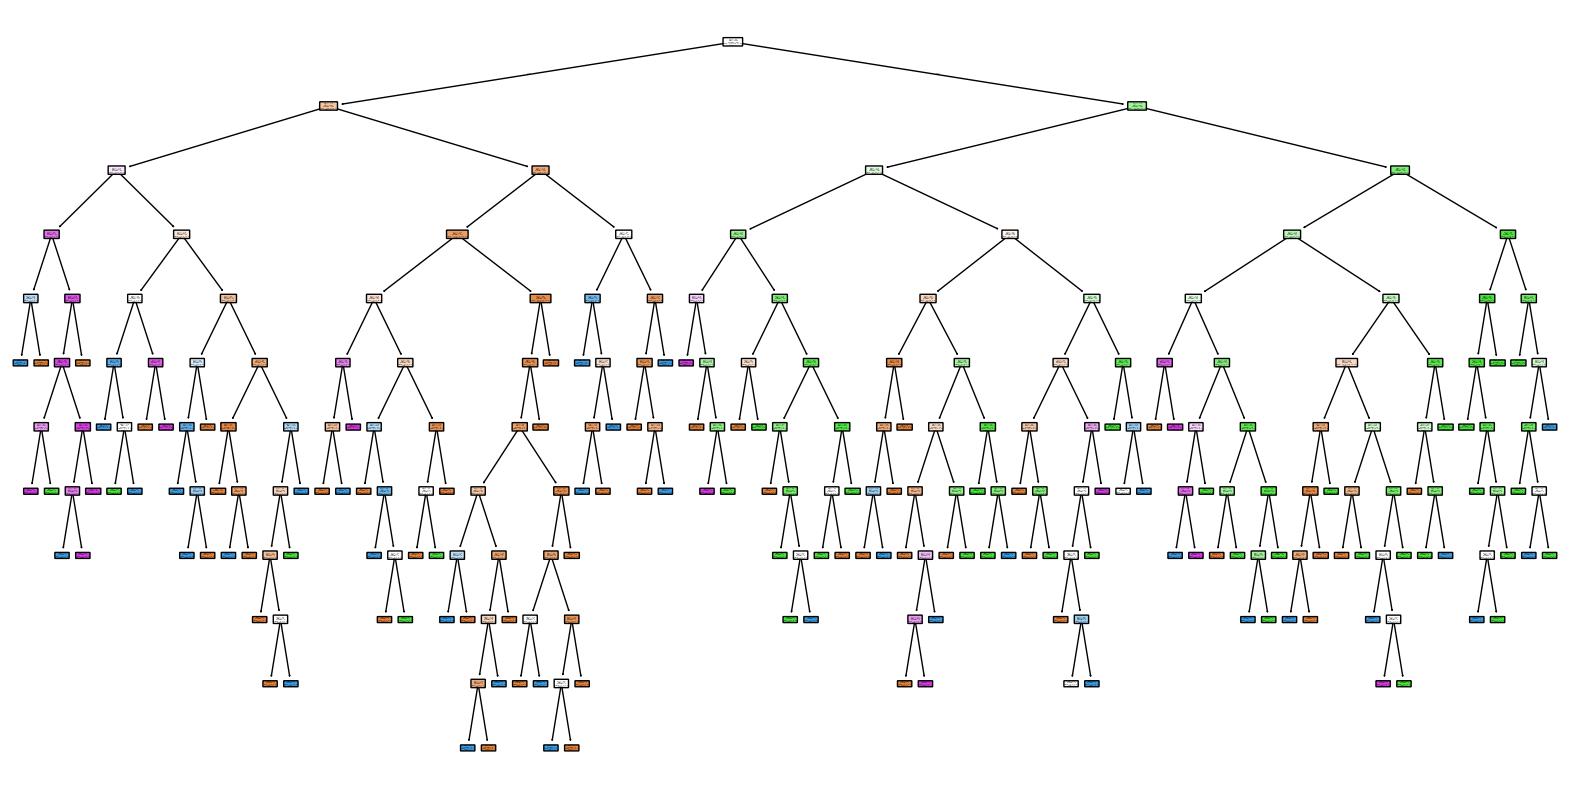

In [10]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, class_names=['2','-2','4','3'], rounded=True)
plt.show()

In [11]:
import pickle

with open('modelo_decision_tree.pkl', 'wb') as f:
    pickle.dump(model, f)